<a href="https://colab.research.google.com/github/MeidiLprog/Cancer-project/blob/main/Breast_cancer_06_11_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import random
import sys
import cv2
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Import des données

In [6]:
!git clone https://github.com/MachineLearnia/breast_cancer_public_data.git

Cloning into 'breast_cancer_public_data'...
remote: Enumerating objects: 4203, done.
remote: Counting objects: 100% (805/805), done.
remote: Compressing objects: 100% (805/805), done.
remote: Total 4203 (delta 0), reused 805 (delta 0), pack-reused 3398 (from 2)
Receiving objects: 100% (4203/4203), 90.60 MiB | 38.21 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [7]:
!ls

breast_cancer_public_data  sample_data


In [27]:
os.chdir("breast_cancer_public_data")

In [28]:
!ls

data  data_2  README.md


In [29]:
folder_path = "./data_2"

In [30]:
# Train data preparation
classes = ["Negative","Cancer"]
dataset = []
for class_label in classes:
    class_path = os.path.join(folder_path,class_label)
    label_index = classes.index(class_label)
    for img_file in tqdm.tqdm(os.listdir(class_path)):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224,224))
        dataset.append([img,label_index])

100%|██████████| 410/410 [00:00<00:00, 1799.60it/s]


array([[[106, 106, 106],
        [145, 145, 145],
        [168, 168, 168],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[154, 154, 154],
        [203, 203, 203],
        [236, 236, 236],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[152, 152, 152],
        [205, 205, 205],
        [243, 243, 243],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 43,  43,  43],
        [ 49,  49,  49],
        [ 50,  50,  50],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 41,  41,  41],
        [ 47,  47,  47],
        [ 48,  48,  48],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 28,  28,  28],
        [ 35,  35,  35],
        [ 37,  37,  37],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]], dtype=uint8)
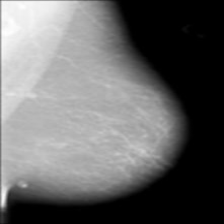

In [31]:
img

# Normalisation

In [32]:
X_images = []
Y_images = []
for img, label in dataset:
    X_images.append(img)
    Y_images.append(label)

# Découpe en un jeu d'entrainement et un jeu de Test

X.shape

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_images, Y_images, test_size=0.2, random_state=42)

# Entrainement du CNN :

In [38]:
from tensorflow.python.ops.gen_nn_ops import Conv
model = Sequential()

model.add(Conv2D(100,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(100,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 100)  │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 100)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 32)   │        28,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 100)    │        57,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       460,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 568,693 (2.17 MB)

 Trainable params: 568,693 (2.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile()

In [ ]:
# Training the model
history = model.fit(....)

# Visualisation des résultats